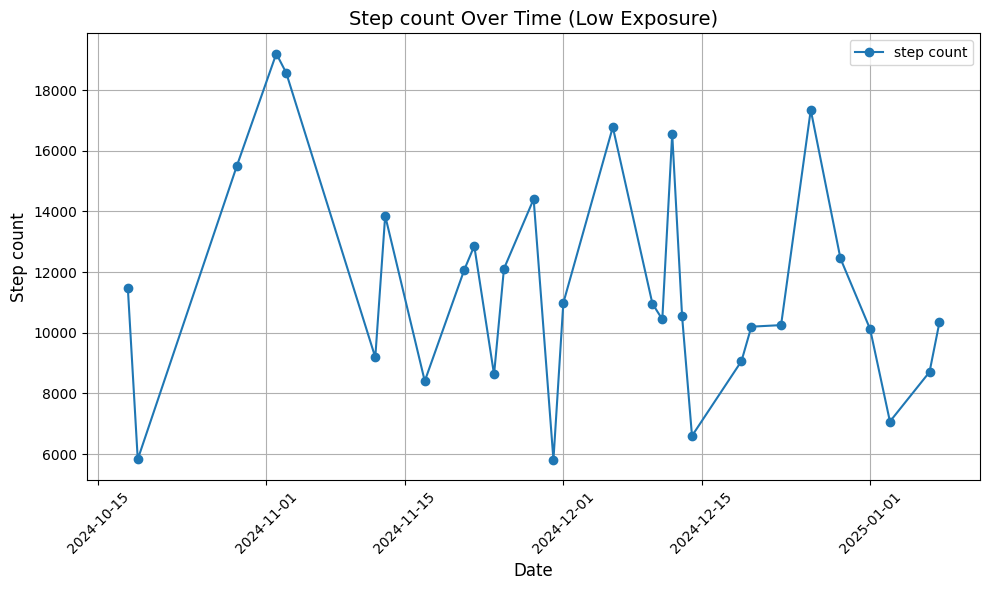

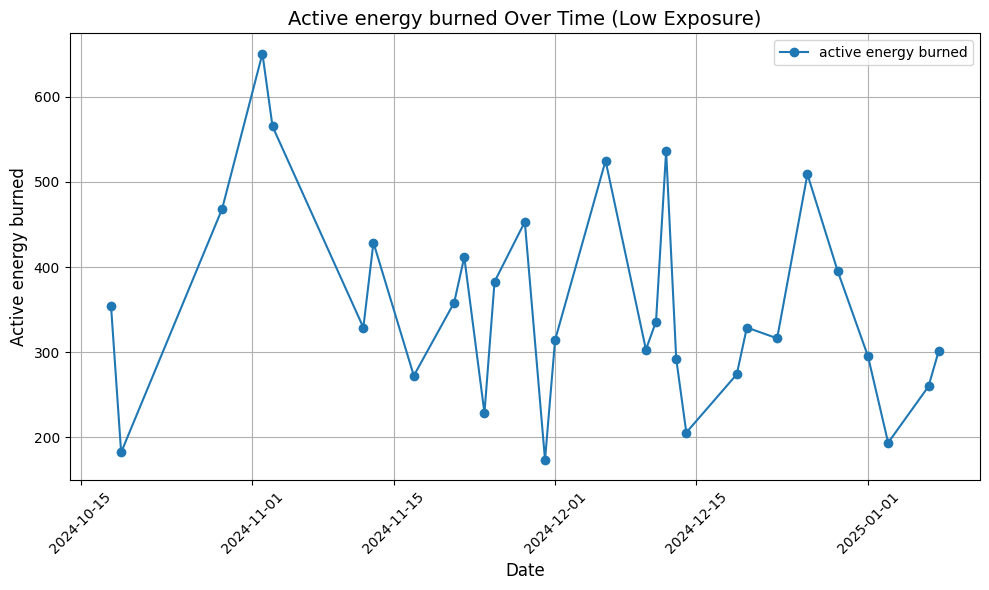

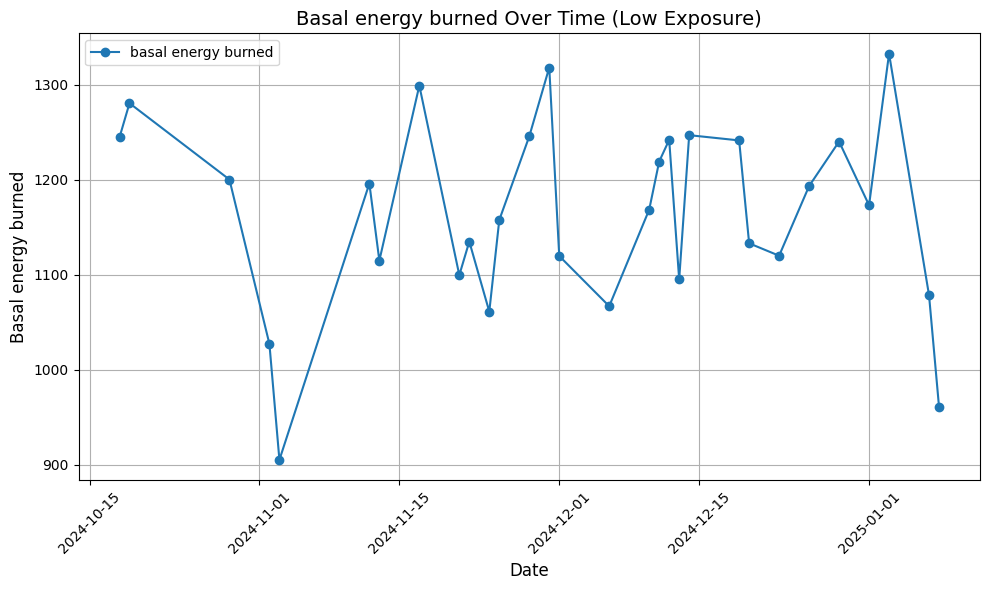

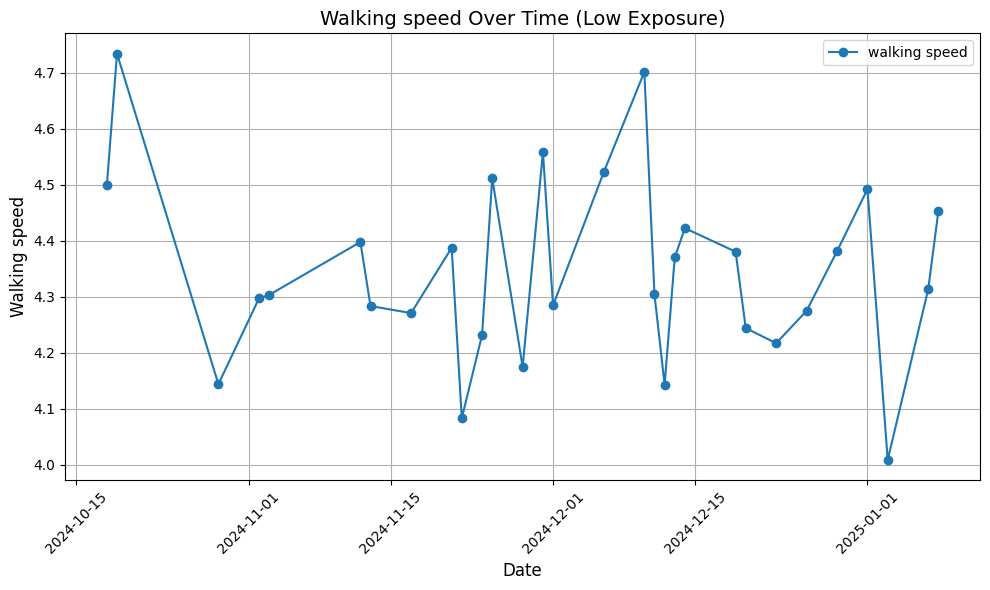

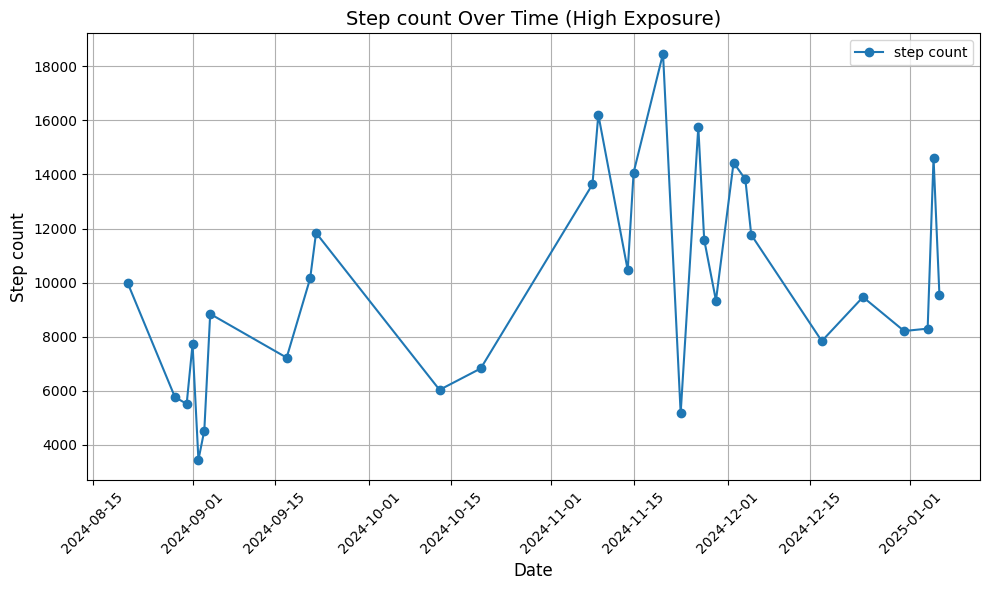

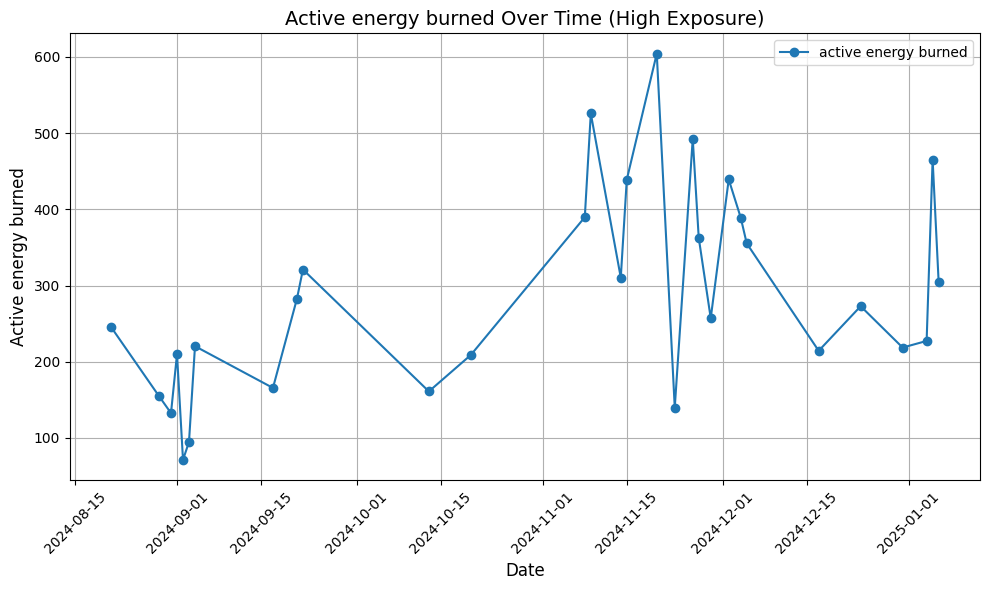

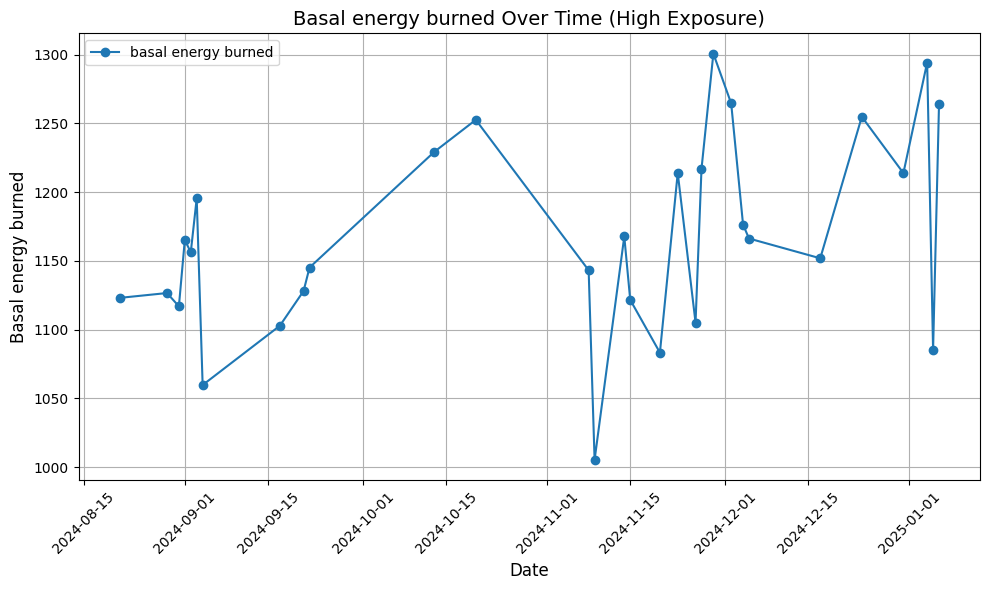

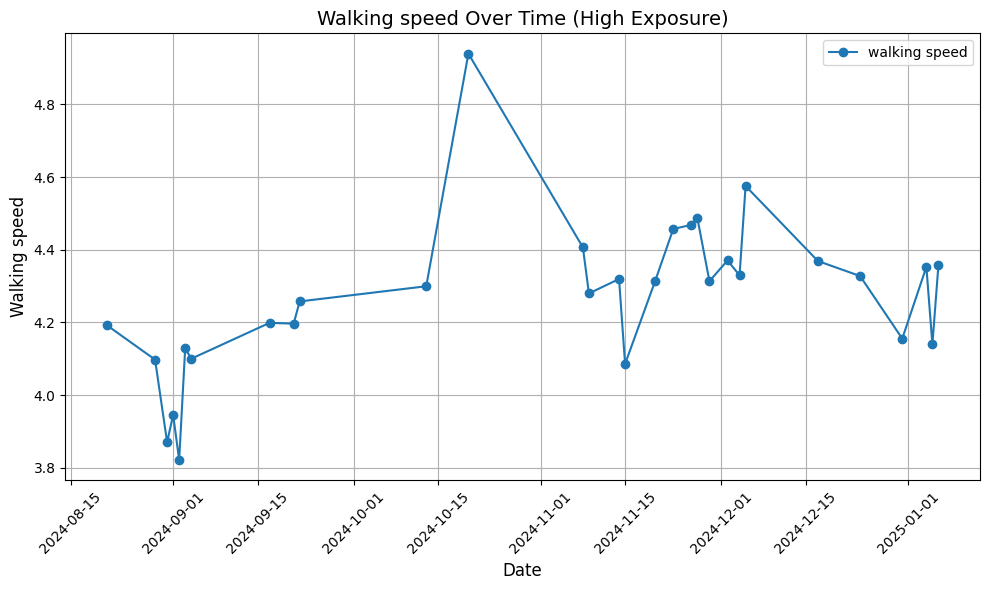

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load merged data
def load_merged_data(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

# Create DataFrame from merged data
def create_dataframe(data, exposure_type):
    df = pd.DataFrame(data[exposure_type])
    df["date"] = pd.to_datetime(df["date"])
    return df

# Plot individual features against date for a given exposure type
def plot_date_vs_features(df, exposure_type):
    features = ["step count", "active energy burned", "basal energy burned", "walking speed"]
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.plot(df["date"], df[feature], marker="o", linestyle="-", label=feature)
        plt.title(f"{feature.capitalize()} Over Time ({exposure_type.capitalize()} Exposure)", fontsize=14)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel(feature.capitalize(), fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Load data
merged_data = load_merged_data("MergedExposureData.json")

# Low Exposure
low_exposure_df = create_dataframe(merged_data, "low_exposure")
plot_date_vs_features(low_exposure_df, "low")

# High Exposure
high_exposure_df = create_dataframe(merged_data, "high_exposure")
plot_date_vs_features(high_exposure_df, "high")


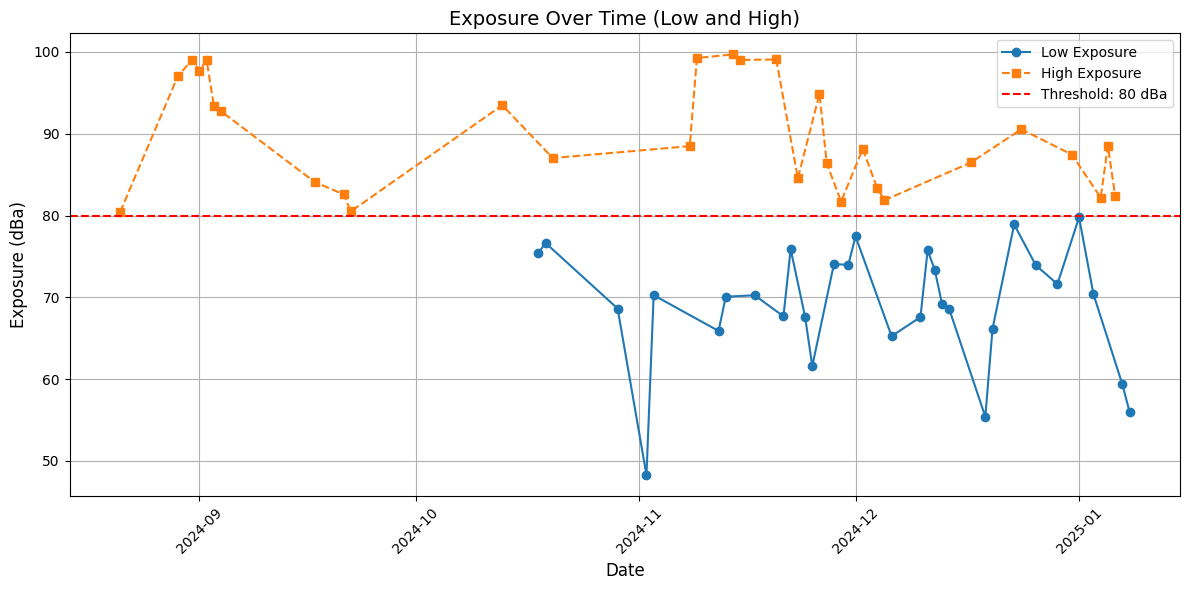

Low Exposure Distance Correlation Matrix (Original Data Only):


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance co

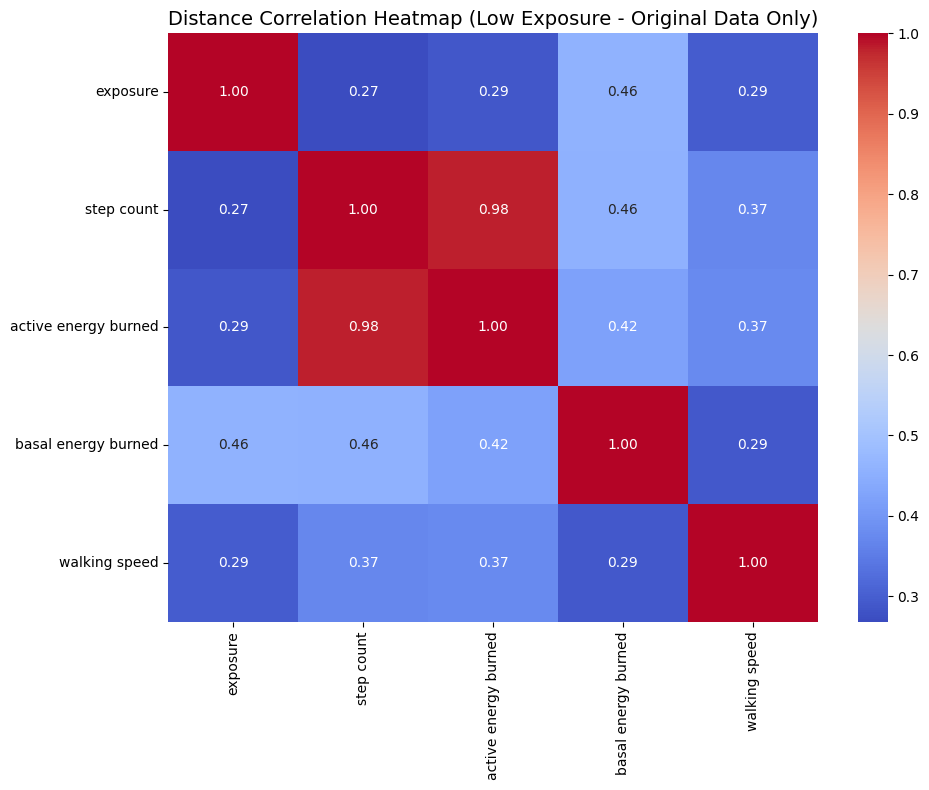

                      exposure  step count  active energy burned  \
exposure              1.000000    0.268574              0.287102   
step count            0.268574    1.000000              0.981723   
active energy burned  0.287102    0.981723              1.000000   
basal energy burned   0.458669    0.455995              0.422003   
walking speed         0.294343    0.369108              0.374483   

                      basal energy burned  walking speed  
exposure                         0.458669       0.294343  
step count                       0.455995       0.369108  
active energy burned             0.422003       0.374483  
basal energy burned              1.000000       0.288897  
walking speed                    0.288897       1.000000  
High Exposure Distance Correlation Matrix (Original Data Only):


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance co

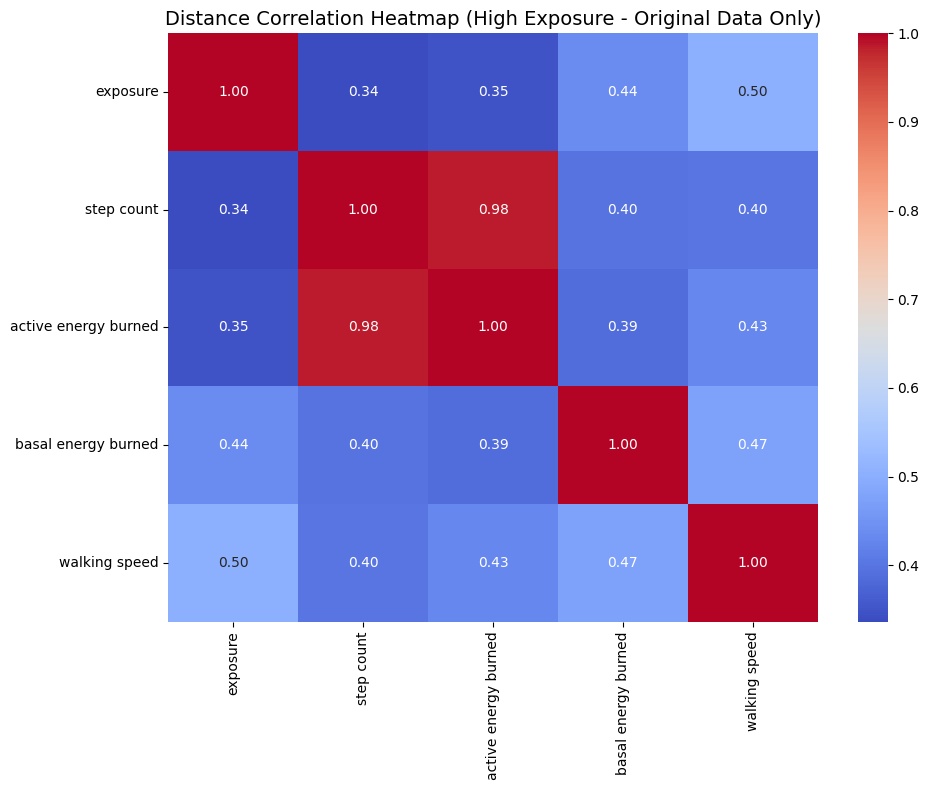

                      exposure  step count  active energy burned  \
exposure              1.000000    0.336482              0.348376   
step count            0.336482    1.000000              0.984993   
active energy burned  0.348376    0.984993              1.000000   
basal energy burned   0.435358    0.398001              0.386605   
walking speed         0.504731    0.400858              0.428679   

                      basal energy burned  walking speed  
exposure                         0.435358       0.504731  
step count                       0.398001       0.400858  
active energy burned             0.386605       0.428679  
basal energy burned              1.000000       0.474764  
walking speed                    0.474764       1.000000  
Covariance Matrix (Combined Data):


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance co

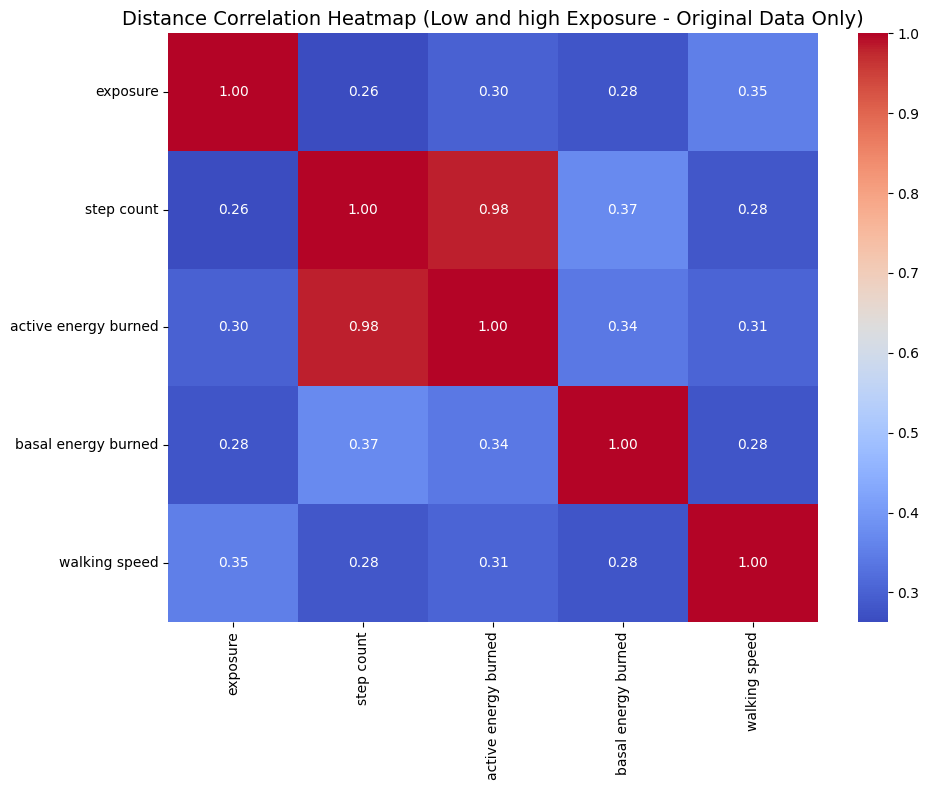

                      exposure  step count  active energy burned  \
exposure              1.000000    0.263607              0.300019   
step count            0.263607    1.000000              0.979916   
active energy burned  0.300019    0.979916              1.000000   
basal energy burned   0.278949    0.370827              0.338868   
walking speed         0.352674    0.281430              0.305218   

                      basal energy burned  walking speed  
exposure                         0.278949       0.352674  
step count                       0.370827       0.281430  
active energy burned             0.338868       0.305218  
basal energy burned              1.000000       0.279377  
walking speed                    0.279377       1.000000  


In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dcor  # Distance correlation package

# Load merged data
def load_merged_data(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

# Plot exposure over time with threshold
def plot_exposure_with_threshold(data, threshold):
    low_df = pd.DataFrame(data["low_exposure"])
    high_df = pd.DataFrame(data["high_exposure"])

    low_df["date"] = pd.to_datetime(low_df["date"])
    high_df["date"] = pd.to_datetime(high_df["date"])

    plt.figure(figsize=(12, 6))

    # Plot low exposure
    plt.plot(low_df["date"], low_df["exposure"], marker="o", linestyle="-", label="Low Exposure")

    # Plot high exposure
    plt.plot(high_df["date"], high_df["exposure"], marker="s", linestyle="--", label="High Exposure")

    # Add threshold line
    plt.axhline(y=threshold, color="red", linestyle="--", label=f"Threshold: {threshold} dBa")

    plt.title("Exposure Over Time (Low and High)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Exposure (dBa)", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform distance correlation analysis for a single dataset
def distance_correlation_analysis(df, exposure_type):
    # Select only rows without imputed values
    imputed_columns = ["step count imputed", "active energy burned imputed", "basal energy burned imputed", "walking speed imputed"]
    original_data = df[~df[imputed_columns].any(axis=1)]

    # Select numerical columns for correlation
    numerical_columns = ["exposure", "step count", "active energy burned", "basal energy burned", "walking speed"]
    subset_data = original_data[numerical_columns]

    # Calculate pairwise distance correlations
    dist_corr_matrix = pd.DataFrame(
        index=numerical_columns, columns=numerical_columns, dtype=float
    )

    for col1 in numerical_columns:
        for col2 in numerical_columns:
            dist_corr_matrix.loc[col1, col2] = dcor.distance_correlation(
                subset_data[col1], subset_data[col2]
            )

    # Display distance correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Distance Correlation Heatmap ({exposure_type.capitalize()} Exposure - Original Data Only)", fontsize=14)
    plt.tight_layout()
    plt.show()

    return dist_corr_matrix


# Main function
def main():
    # Set the threshold (default: 80 dBa)
    threshold = 80

    # Load data
    merged_data = load_merged_data("MergedExposureData.json")

    # Plot exposure with threshold
    plot_exposure_with_threshold(merged_data, threshold)

    # Create DataFrames for low and high exposure
    low_exposure_df = pd.DataFrame(merged_data["low_exposure"])
    high_exposure_df = pd.DataFrame(merged_data["high_exposure"])
    combined_df = pd.concat([low_exposure_df, high_exposure_df], ignore_index=True)


    # Perform distance correlation analysis for low exposure
    print("Low Exposure Distance Correlation Matrix (Original Data Only):")
    low_dist_corr_matrix = distance_correlation_analysis(low_exposure_df, "low")
    print(low_dist_corr_matrix)

    # Perform distance correlation analysis for high exposure
    print("High Exposure Distance Correlation Matrix (Original Data Only):")
    high_dist_corr_matrix = distance_correlation_analysis(high_exposure_df, "high")
    print(high_dist_corr_matrix)

    # Calculate and display covariance matrix for combined data
    print("Covariance Matrix (Combined Data):")
    covariance_matrix = distance_correlation_analysis(combined_df, "low and High")
    print(covariance_matrix)

if __name__ == "__main__":
    main()
